<a href="https://colab.research.google.com/github/HaroonBangash/Kaggle_Competitions_Projects/blob/main/House_Price_Predictions_Kaggle_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


In [2]:
import seaborn as sns

In [4]:
iowa_file_path = pd.read_csv(r'/content/train.csv')

In [5]:
df = iowa_file_path
df.head()
df.shape

(1460, 81)

In [6]:
#pd.set_option('display.max_columns',None)
pd.reset_option('display.max_columns')
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<Axes: >

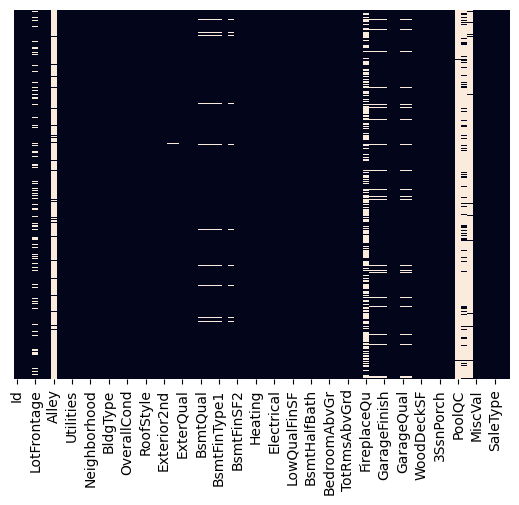

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [8]:
#dropping these columns because there Nan values are much more then filled value
df.drop(['Id','Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)


In [9]:
#filling missing values in lotFrontage because it dtype is float so we will replace nan with mean
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [10]:
df.isnull().sum()


MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [12]:
df.dropna()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


<Axes: >

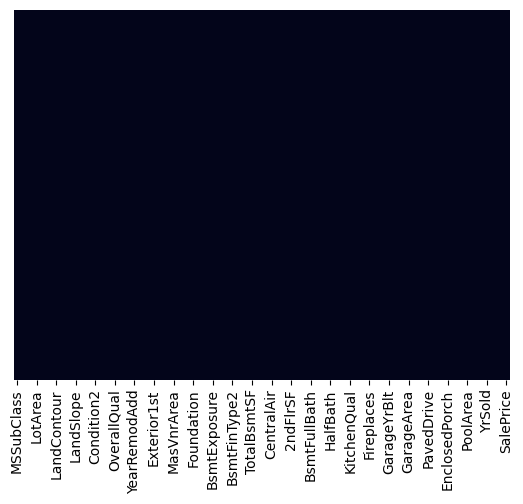

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [14]:
pd.reset_option('display.max_columns')

In [15]:
df.shape

(1460, 76)

In [16]:
import os
os.getcwd()

'/content'

In [17]:
main_df=df.copy()
df.shape

(1460, 76)

In [19]:
df_test=pd.read_csv('/content/clean_test_data.csv')

In [20]:
df_test.shape

(1459, 74)

In [21]:
df_test.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 74, dtype: int64

In [22]:
# making both cleaned training and testing data combined before 1 hot encoding
final_df=pd.concat([df,df_test],axis=0)

final_df.reset_index(drop=True,inplace=True)

In [23]:
final_df.iloc[1450:1462,:]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1450,90,RL,60.0,9000,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,9,2009,WD,Normal,136000.0
1451,20,RL,78.0,9262,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2009,New,Partial,287090.0
1452,180,RM,35.0,3675,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2006,WD,Normal,145000.0
1453,20,RL,90.0,17217,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2006,WD,Abnorml,84500.0
1454,20,FV,62.0,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2009,WD,Normal,185000.0
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000.0
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000.0
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500.0
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125.0
1459,20,RL,75.0,9937,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2008,WD,Normal,147500.0


In [24]:
categories = df.select_dtypes(include='object').columns.tolist()

# Print the names of columns with object data type
print(categories)
len(categories)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


39

In [25]:
#we will define a function to convert our categorical variables into one hot encoding
def one_hot_encoding(multicolumns):

    df_final=final_df

    i=0

    for fields in multicolumns:

        print(fields)

        df1=pd.get_dummies(final_df[fields],drop_first=True)

        final_df.drop([fields], axis=1, inplace = True)

        if i==0:
            df_final=df1.copy()

        else:
            df_final=pd.concat([df_final,df1],axis=1)

        i=i+1

    df_final=pd.concat([final_df,df_final],axis=1)

    return df_final

In [26]:
final_df= one_hot_encoding(categories)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [27]:
final_df.shape

(2919, 237)

In [28]:
# Removing the duplicated columns
final_df = final_df.loc[:,~final_df.columns.duplicated()]

In [29]:
final_df.shape

(2919, 177)

In [30]:
train_df = final_df.iloc[:1460,:]

In [31]:
train_df.shape

(1460, 177)

In [32]:
test_df = final_df.iloc[1460:,:]

In [33]:
test_df.shape

(1459, 177)

In [34]:
y_train= train_df['SalePrice']

In [35]:
test_df.drop(['SalePrice'],axis=1,inplace=True)

<ipython-input-35-66dc09fcbaf7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop(['SalePrice'],axis=1,inplace=True)


In [36]:
train_df.drop(['SalePrice'],axis=1,inplace=True)

<ipython-input-36-fc9f5f6a92c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(['SalePrice'],axis=1,inplace=True)


In [37]:
test_df.drop(['Fireplaces'],axis=1,inplace=True)

<ipython-input-37-7bacbb4ea9b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop(['Fireplaces'],axis=1,inplace=True)


In [38]:
train_df.drop(['Fireplaces'],axis=1,inplace=True)

<ipython-input-38-accaabbf18f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(['Fireplaces'],axis=1,inplace=True)


In [39]:
test_df.isnull().sum()

MSSubClass     0
LotFrontage    0
LotArea        0
OverallQual    0
OverallCond    0
              ..
AdjLand        0
Alloca         0
Family         0
Normal         0
Partial        0
Length: 175, dtype: int64

In [40]:
X_train=train_df
#y_train=train_df['SalePrice']
y_train.isnull().sum()

0

In [41]:
X_train.shape

(1460, 175)

In [42]:
X_train.shape

(1460, 175)

In [43]:
test_df.shape

(1459, 175)

# APPLYING XGBOOST MODEL

In [44]:
pip install xgboost

In [45]:
import xgboost
classifier=xgboost.XGBRegressor()
classifier.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [46]:
import pickle

In [47]:
import pickle
filename = 'final_model.pkl'
pickle.dump(classifier,open(filename,'wb'))

In [48]:
test_df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'ConLI', 'ConLw', 'New', 'Oth', 'WD', 'AdjLand', 'Alloca', 'Family',
       'Normal', 'Partial'],
      dtype='object', length=175)

In [49]:
train_df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'ConLI', 'ConLw', 'New', 'Oth', 'WD', 'AdjLand', 'Alloca', 'Family',
       'Normal', 'Partial'],
      dtype='object', length=175)

In [50]:
y_pred=classifier.predict(test_df)
y_pred.mean()

179750.42

In [52]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('/content/sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)

In [53]:
pip install keras

In [54]:
pip install tensorflow

**APPLYING ANN IMPLEMENTATION**

In [55]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


In [56]:
import keras.backend as k
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [57]:
import keras.backend as K

# Define the root_mean_squared_error function
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# Rest of your code
# ...

# Create the classifier and add layers
classifier = Sequential()
classifier.add(Dense(units=50, activation='relu', kernel_initializer='he_uniform', input_dim=175))
classifier.add(Dense(units=25, activation='relu', kernel_initializer='he_uniform'))
classifier.add(Dense(units=50, activation='relu', kernel_initializer='he_uniform'))
classifier.add(Dense(units=1, kernel_initializer='he_uniform'))

# Compile the model with the custom loss function
classifier.compile(loss=root_mean_squared_error, optimizer='Adamax')

# Fit the model to the training data
model_history = classifier.fit(X_train.values, y_train.values, validation_split=0.20, batch_size=10, epochs=1000)


Epoch 1/1000
117/117 [==============================] - 10s 5ms/step - loss: 174325.7656 - val_loss: 138392.3906
Epoch 2/1000
117/117 [==============================] - 0s 4ms/step - loss: 89554.4609 - val_loss: 66035.0781
Epoch 3/1000
117/117 [==============================] - 0s 3ms/step - loss: 66771.6406 - val_loss: 64452.2930
Epoch 4/1000
117/117 [==============================] - 0s 4ms/step - loss: 64841.5156 - val_loss: 62886.4531
Epoch 5/1000
117/117 [==============================] - 0s 3ms/step - loss: 62451.3164 - val_loss: 61451.5195
Epoch 6/1000
117/117 [==============================] - 0s 3ms/step - loss: 60599.6172 - val_loss: 59837.0430
Epoch 7/1000
117/117 [==============================] - 0s 3ms/step - loss: 58141.2891 - val_loss: 58449.9570
Epoch 8/1000
117/117 [==============================] - 0s 3ms/step - loss: 56452.5938 - val_loss: 57037.9492
Epoch 9/1000
117/117 [==============================] - 0s 4ms/step - loss: 53712.9531 - val_loss: 55661.6797
Epoch 1

In [73]:
ann_pred=classifier.predict(test_df.values)
ann_pred.mean()

46/46 [==============================] - 0s 3ms/step


185913.25

In [ ]:
df_test.shape

(1459, 74)

#  APPLYING RANDOM FOREST REGRESSOR

In [ ]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
rf_test_predictions = rf_model.predict(test_df)
rf_test_predictions

179013.65018734292

In [ ]:
pred=pd.DataFrame(rf_test_predictions)
sub_df=pd.read_csv('D:\kaggle\sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)